# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [2]:
pip install --upgrade notebook ipywidgets

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: notebook in /root/.local/lib/python3.7/site-packages (6.5.7)
  Using cached ipywidgets-8.1.3-py3-none-any.whl (139 kB)
  Using cached widgetsnbextension-4.0.11-py3-none-any.whl (2.3 MB)


  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.0
    Uninstalling ipywidgets-7.7.0:
      Successfully uninstalled ipywidgets-7.7.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
  Using cached ipywidgets-7.7.0-py2.py3-none-any.whl (123 kB)
  Using cached widgetsnbextension-3.6.6-py2.py3-none-any.whl (1.6 MB)


  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 4.0.11
    Uninstalling widgetsnbextension-4.0.11:
      Successfully uninstalled widgetsnbextension-4.0.11
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 8.1.3
    Uninstalling ipywidgets-8.1.3:
      Successfully uninstalled ipywidgets-8.1.3


## Imports

In [4]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [5]:
# Define transforms
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Create training set and define training dataloader
training_set = torchvision.datasets.MNIST(root="data", train=True, download=True,  transform=transform)
test_set = torchvision.datasets.MNIST(root="data", train=False, download=True, transform=transform)

train_set, valid_set = train_test_split(training_set, test_size=0.2, random_state=42)

# Create test set and define test dataloader
train_loader = torch.utils.data.DataLoader(train_set, batch_size=16, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=16, shuffle=False)
valid_loader = torch.utils.data.DataLoader(valid_set, batch_size=16)



In [6]:
inputs, target = next(iter(test_loader))

In [7]:
inputs.shape

torch.Size([16, 1, 28, 28])

In [8]:
len(target)

16

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

* The chosen transforms serve two main purposes: 
    * converting the image data into a format suitable for PyTorch tensors and normalizing the pixel values to aid in model training.
        * Converting images to tensors allows for seamless integration with PyTorch's computational graph, facilitating efficient computation during training.
        * Normalizing the data to have a mean of 0.5 and a standard deviation of 0.5 helps stabilize and speed up the training process by ensuring that the input features are on a similar scale, preventing certain features from dominating the learning process. 

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [9]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

Training set dimensions:
Number of samples: 60000
Shape of the first image tensor: torch.Size([1, 28, 28])

Test set dimensions:
Number of samples: 10000
Shape of the first image tensor: torch.Size([1, 28, 28])

Sample images from the training set:
1


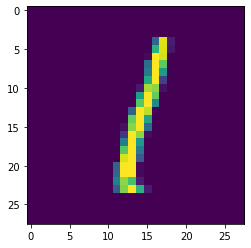

3


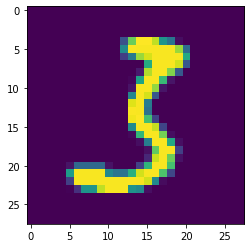

8


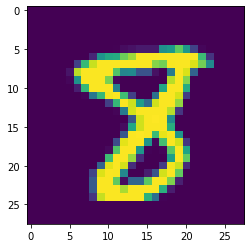

9


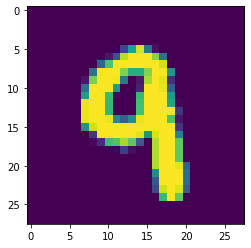

1


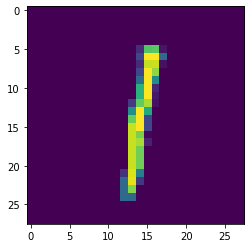


Sample images from the test set:
7


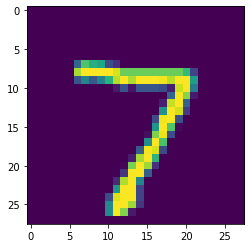

2


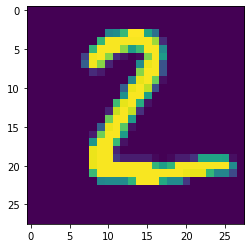

1


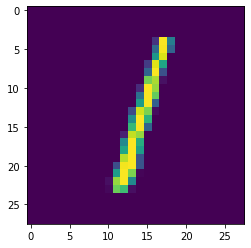

0


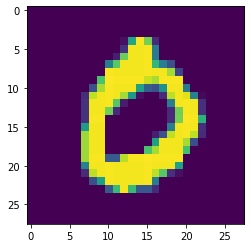

4


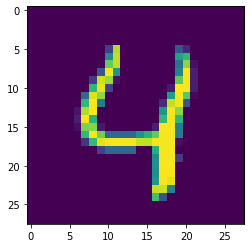

In [10]:
# Explore data
# Dimensions of training set
print("Training set dimensions:")
print("Number of samples:", len(training_set))
print("Shape of the first image tensor:", training_set[0][0].shape)

# Dimensions of test set
print("\nTest set dimensions:")
print("Number of samples:", len(test_set))
print("Shape of the first image tensor:", test_set[0][0].shape)

# Show 5 sample images from the training set
print("\nSample images from the training set:")
show5(train_loader)

# Show 5 sample images from the test set
print("\nSample images from the test set:")
show5(test_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [12]:
class MNIST_net(nn.Module):
    def __init__(self):
        super(MNIST_net, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    
model = MNIST_net()

In [13]:
# Move the model to the GPU
model.to(device)

MNIST_net(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [14]:
criterion = nn.CrossEntropyLoss()

# Define optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [15]:
num_epoch = 7
train_losses = []
valid_losses = []


for epoch in range(num_epoch):
    running_loss = 0.0
    model.train()
    
    for i, data in enumerate(train_loader, 0):
        inputs, targets = data
        inputs, targets = inputs.to(device), targets.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        
        loss.backward()
        optimizer.step()
        
        
        running_loss += loss.item()
        
        if i % 750 == 249:
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 250:.3f}")
            running_loss = 0.0
            
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch + 1} - Training Loss: {epoch_loss:.3f}")
    
    model.eval()  # Set the model to evaluation mode
    valid_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for data in valid_loader:
            inputs, targets = data[0].to(device), data[1].to(device)
            
            putputs = model(inputs)
            loss = criterion(outputs, targets)
            valid_loss += loss.item()
            
            _, predicted = torch.max(putputs, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            
            
    valid_loss /= len(test_loader)
    accuracy = correct / total
    valid_losses.append(valid_loss)
    
    print(f"Epoch {epoch + 1} - Validation Loss: {valid_loss:.3f}, Accuracy: {100 * accuracy:.2f}%")

print('Finished Training')
    

[Epoch 1, Batch 250] Loss: 0.988
[Epoch 1, Batch 1000] Loss: 1.244
[Epoch 1, Batch 1750] Loss: 0.926
[Epoch 1, Batch 2500] Loss: 0.793
Epoch 1 - Training Loss: 0.036
Epoch 1 - Validation Loss: 10.789, Accuracy: 93.55%
[Epoch 2, Batch 250] Loss: 0.205
[Epoch 2, Batch 1000] Loss: 0.584
[Epoch 2, Batch 1750] Loss: 0.566
[Epoch 2, Batch 2500] Loss: 0.522
Epoch 2 - Training Loss: 0.028
Epoch 2 - Validation Loss: 12.748, Accuracy: 94.90%
[Epoch 3, Batch 250] Loss: 0.157
[Epoch 3, Batch 1000] Loss: 0.451
[Epoch 3, Batch 1750] Loss: 0.400
[Epoch 3, Batch 2500] Loss: 0.442
Epoch 3 - Training Loss: 0.022
Epoch 3 - Validation Loss: 14.534, Accuracy: 95.68%
[Epoch 4, Batch 250] Loss: 0.115
[Epoch 4, Batch 1000] Loss: 0.363
[Epoch 4, Batch 1750] Loss: 0.370
[Epoch 4, Batch 2500] Loss: 0.367
Epoch 4 - Training Loss: 0.022
Epoch 4 - Validation Loss: 13.203, Accuracy: 95.99%
[Epoch 5, Batch 250] Loss: 0.118
[Epoch 5, Batch 1000] Loss: 0.310
[Epoch 5, Batch 1750] Loss: 0.323
[Epoch 5, Batch 2500] Loss:

Plot the training loss (and validation loss/accuracy, if recorded).

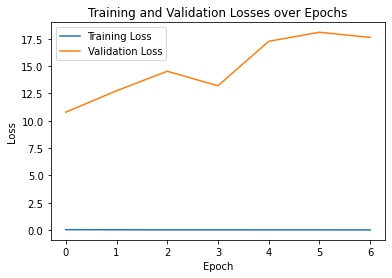

In [16]:
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses over Epochs')
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [18]:
correct = 0
total = 0

model.eval()
valid_loss = 0.0

with torch.no_grad():
    for data in test_loader:
        inputs, targets = data[0].to(device), data[1].to(device)
        
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct = (predicted == targets).sum().item()
        
accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy:.2f}%")


Accuracy on the test set: 0.16%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [20]:
## YOUR CODE HERE ##
# Define a new model instance
model = MNIST_net()

# Move model to device
model.to(device)

# Define a new optimizer with a different learning rate
optimizer = optim.Adam(model.parameters(), lr=0.0005)  # Adjust the learning rate

# Define a different number of epochs
num_epochs = 10  # Increase the number of epochs

# Lists to store training and validation losses per epoch
train_losses = []
valid_losses = []

# Training loop
for epoch in range(num_epochs):
    # Training
    model.train()  # Set the model to training mode
    running_loss = 0.0
    
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        # Backward pass and optimize
        loss.backward()
        optimizer.step()
        
        # Print statistics
        running_loss += loss.item()
        if i % 750 == 749:    # Print every 250 mini-batches
            print(f"[Epoch {epoch + 1}, Batch {i + 1}] Training Loss: {running_loss / 250:.3f}")
            running_loss = 0.0
    
    # Calculate average training loss for the epoch
    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)
    print(f"Epoch {epoch + 1} - Training Loss: {epoch_loss:.3f}")
    
    # Validation
    model.eval()  # Set the model to evaluation mode
    valid_loss = 0.0
    
    with torch.no_grad():
        for data in valid_loader:
            inputs, labels = data[0].to(device), data[1].to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item()
    
    # Calculate average validation loss for the epoch
    valid_loss /= len(valid_loader)
    valid_losses.append(valid_loss)
    print(f"Epoch {epoch + 1} - Validation Loss: {valid_loss:.3f}")

print('Finished Training')

[Epoch 1, Batch 750] Training Loss: 2.046
[Epoch 1, Batch 1500] Training Loss: 1.094
[Epoch 1, Batch 2250] Training Loss: 0.954
[Epoch 1, Batch 3000] Training Loss: 0.820
Epoch 1 - Training Loss: 0.000
Epoch 1 - Validation Loss: 0.230
[Epoch 2, Batch 750] Training Loss: 0.711
[Epoch 2, Batch 1500] Training Loss: 0.626
[Epoch 2, Batch 2250] Training Loss: 0.585
[Epoch 2, Batch 3000] Training Loss: 0.524
Epoch 2 - Training Loss: 0.000
Epoch 2 - Validation Loss: 0.187
[Epoch 3, Batch 750] Training Loss: 0.456
[Epoch 3, Batch 1500] Training Loss: 0.505
[Epoch 3, Batch 2250] Training Loss: 0.425
[Epoch 3, Batch 3000] Training Loss: 0.410
Epoch 3 - Training Loss: 0.000
Epoch 3 - Validation Loss: 0.160
[Epoch 4, Batch 750] Training Loss: 0.363
[Epoch 4, Batch 1500] Training Loss: 0.385
[Epoch 4, Batch 2250] Training Loss: 0.369
[Epoch 4, Batch 3000] Training Loss: 0.357
Epoch 4 - Training Loss: 0.000
Epoch 4 - Validation Loss: 0.129
[Epoch 5, Batch 750] Training Loss: 0.302
[Epoch 5, Batch 15

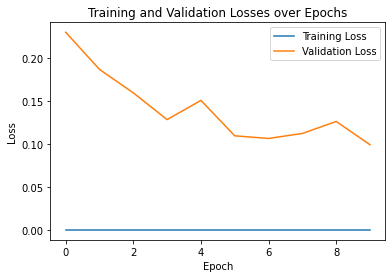

In [21]:
# Plot training and validation losses
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses over Epochs')
plt.legend()
plt.show()

In [22]:
# Calculate accuracy on the test set
correct = 0
total = 0

# Set model to evaluation mode
model.eval()

# Disable gradient calculation
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data[0].to(device), data[1].to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy on the test set: {accuracy:.2f}%")

Accuracy on the test set: 97.00%


## Saving your model
Using `torch.save`, save your model for future loading.

In [23]:
# Specify the file path where you want to save the model
model_path = 'mnist_model.pth'

# Save the model
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")


Model saved to mnist_model.pth
